### Shadow and Gaussian $\Sigma$ matrix comparison

Shadow code from 'sirepo_demo_kb_gsn02' simulation on sirepo.com/shadow

In [1]:
import numpy as np
import shadow_blicon_util as sbu
import transfer_mat_bl as tmb
import Shadow.ShadowTools
import copy
import time

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#### Beam parameters

In [2]:
ph_E = 9e3        # photon energy [eV]
sigx_init = 1e-3  # initial horizontal beam size [cm]
sigz_init = 1e-3  # initial vertical beam size [cm]
sigdix_init = 1.1200929999999999e-06  # initial horizontal divergence [rad]
sigdiz_init = 1.1200929999999999e-06  # initial vertical divergence [rad]

#### Calculate coherence

In [3]:
# wavelength [cm]
hc = 1.2398419843320026   # hc quantity [eV micron]
ph_lambda = hc / ph_E * 1e-6 * 1e2

# calculate m squared values horizontal and vertical
m_sq_x = sigx_init * sigdix_init / (ph_lambda / 4 / np.pi)
m_sq_z = sigz_init * sigdiz_init / (ph_lambda / 4 / np.pi)

print('m squared value horizontal: %s' %(m_sq_x)) 
print('m squared value vertical: %s' %(m_sq_z)) 

m squared value horizontal: 1.021739346189318
m squared value vertical: 1.021739346189318


#### Run Shadow simulation with dense Gaussian dist rays

In [4]:
# beam_gsn_init = sbu.shadow_src_beam(n_rays=100000, ran_seed=15829, dist_type=3, sigx=sigx_init, sigz=sigz_init, 
#                                 sigdix=sigdix_init, sigdiz=sigdiz_init, hdiv1 = 0.0, hdiv2 = 0.0, vdiv1 =0.0, 
#                                 vdiv2=0.0, ph_energy = 9e3)

# # create a duplicate of initial beam object to be transformed during propagation
# beam_gsn_init_copy = beam_gsn_init.duplicate()
# beam_gsn_fin = sbu.run_shdw_kb_gsn(beam_gsn_init_copy)

In [5]:
# sbu.shdw_plt(beam_gsn_fin)

#### Calculate error in sigma_x for transfer mat method as function of epsilon

In [6]:
n_epsilon = 50                                                   # no. of yaw parameters to scan 
epsilon_min = -13                                                 # min value of yaw [deg]
epsilon_max = -4                                               # max value of yaw [deg]
epsilon_vals = np.logspace(epsilon_min, epsilon_max, n_epsilon)             # array of yaw vals [deg]

printmd('%s scans in range of epsilon values: {1E%.1f, 1E%.1f}' %(n_epsilon, epsilon_min, epsilon_max))


sigmax_error_vals = []

# create initial sigma matrix
res = np.matrix([
        [sigx_init ** 2, 0, 0, 0],
        [0, sigdix_init ** 2, 0, 0],
        [0, 0, sigz_init ** 2, 0],
        [0, 0, 0, sigdiz_init ** 2],
    ])

t0 = time.time()
for j in range(len(epsilon_vals)):
    # printmd('***')
    # printmd(r'roll misalignment: %s mrad' %(el_ro_vals[j]*1e3))
    
    # calculate sigma_x from transfer mat propagation
    
    # create initial set of 4 offset rays and 1 central ray
    beam_tmat_init = tmb.create_mat_rays(epsilon_vals[j])
    
    # pass initial rays through beamline
    beam_tmat_fin = sbu.run_shdw_kb_gsn(beam_tmat_init)
    
    # calculate transfer matrix from final propagated rays
    tmat, x_prop_cen, xp_prop_cen, z_prop_cen, zp_prop_cen = tmb.tmat_calc(beam_tmat_fin, epsilon_vals[j])
    
    # propagate sigma matrix with transfer matrix
    res_prop = np.matmul(np.matmul(tmat, res), tmat.T)
    
    # calculate sigma_x from res_prop
    sigma_x_tmat_method = np.sqrt(res_prop[0, 0])
    
    # calculate sigma_x from Shadow propagation
    beam_gsn_init = sbu.shadow_src_beam(n_rays=100000, ran_seed=15829, dist_type=3, sigx=sigx_init, sigz=sigz_init, 
                                sigdix=sigdix_init, sigdiz=sigdiz_init, hdiv1 = 0.0, hdiv2 = 0.0, vdiv1 =0.0, 
                                vdiv2=0.0, ph_energy = 9e3)

    # create a duplicate of initial beam object to be transformed during propagation
    beam_gsn_init_copy = beam_gsn_init.duplicate()
    beam_gsn_fin = sbu.run_shdw_kb_gsn(beam_gsn_init_copy)
    
    # calculate sigma matrix from propagated Shadow ray distribution
    shdw_sigma_mat_fin = sbu.rays_sigma_mat(beam_gsn_fin)
    
    sigma_x_shdw = np.sqrt(shdw_sigma_mat_fin[0, 0])
    
    # calculate error between Shadow and transfer mat methods and append to array
    sigmax_error_vals.append((sigma_x_shdw - sigma_x_tmat_method) / sigma_x_shdw)
    
    
t1 = time.time()
printmd('***')
printmd("simulation time: %4.3f seconds" % ((t1 - t0)))    

print(sigmax_error_vals)

50 scans in range of epsilon values: {1E-13.0, 1E-4.0}

 Exit from SOURCE
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 Exit from MIRROR
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 MIRROR1: Warning: Empty element (no mirr.xx file)
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 Exit from MIRROR
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC
 Call to RESET
 Exit from

***

simulation time: 29.482 seconds

[-0.6759794713188798, 0.058972898983114266, -0.3144762776802649, 0.3394083619651747, 0.7133527943893369, 0.22478534294802188, 0.1417962054448119, 0.07162711318221728, 0.10280972772936267, -0.020748831636966083, 0.054609144524263055, 0.010854654894823857, 0.0014999601274949211, 0.0015394771603242136, -0.007041379788822963, -0.0020085910428313527, 0.0003776864925136519, -0.0015177998080252194, -0.003676905819109862, -0.004140839671779882, -0.00291668882176351, -0.003456164824921523, -0.003296155205188184, -0.0034553166399838285, -0.003493549869132462, -0.0035143143479702222, -0.0034884320953014825, -0.003521552842139854, -0.0035547613020413715, -0.0035569488246398884, -0.003564110243345877, -0.0035656968468345844, -0.0035664070983338794, -0.003560701456873236, -0.003562338325227051, -0.0035627940018767464, -0.00356282965213983, -0.0035630963505620555, -0.003563363212682088, -0.0035631406467476275, -0.003563157088845105, -0.003563450877550218, -0.003563416894009183, -0.0035635741441675303

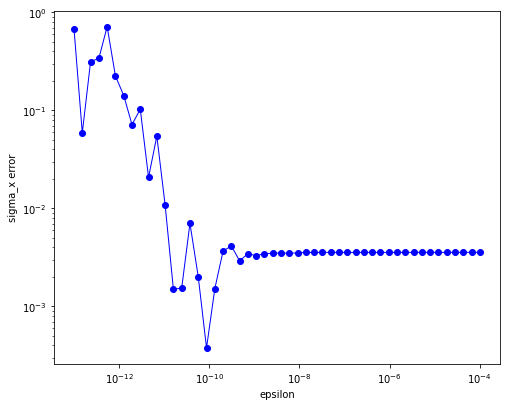

In [21]:
# plot sigma_x error vs epsilon
fig = plt.figure(figsize=(8,6.5))
ax = fig.gca()
ax.plot(epsilon_vals, np.abs(sigmax_error_vals), 'b-o', lw = 1)
plt.xscale('log')
plt.yscale('log')
# ax.vlines(t_vals, 0, T_center, linestyle="dashed")
# ax.axvline(x=t_off, color='k', ls='--')
ax.set_xlabel(r'epsilon')
ax.set_ylabel(r'sigma_x error')
# ax.legend() 
fig.show()

In [8]:
print(epsilon_vals)

[1.00000000e-13 1.52641797e-13 2.32995181e-13 3.55648031e-13
 5.42867544e-13 8.28642773e-13 1.26485522e-12 1.93069773e-12
 2.94705170e-12 4.49843267e-12 6.86648845e-12 1.04811313e-11
 1.59985872e-11 2.44205309e-11 3.72759372e-11 5.68986603e-11
 8.68511374e-11 1.32571137e-10 2.02358965e-10 3.08884360e-10
 4.71486636e-10 7.19685673e-10 1.09854114e-09 1.67683294e-09
 2.55954792e-09 3.90693994e-09 5.96362332e-09 9.10298178e-09
 1.38949549e-08 2.12095089e-08 3.23745754e-08 4.94171336e-08
 7.54312006e-08 1.15139540e-07 1.75751062e-07 2.68269580e-07
 4.09491506e-07 6.25055193e-07 9.54095476e-07 1.45634848e-06
 2.22299648e-06 3.39322177e-06 5.17947468e-06 7.90604321e-06
 1.20679264e-05 1.84206997e-05 2.81176870e-05 4.29193426e-05
 6.55128557e-05 1.00000000e-04]


In [9]:
epsilon = 1e-6    # beam offest parameter

# create initial set of 4 offset rays and 1 central ray
beam_tmat_init = tmb.create_mat_rays(epsilon)

# pass initial rays through beamline
beam_tmat_fin = sbu.run_shdw_kb_gsn(beam_tmat_init)

# calculate transfer matrix from final propagated rays
tmat, x_prop_cen, xp_prop_cen, z_prop_cen, zp_prop_cen = tmb.tmat_calc(beam_tmat_fin, epsilon)

print('transfer matrix:', tmat)

 Exit from SOURCE
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 Exit from MIRROR
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 MIRROR1: Warning: Empty element (no mirr.xx file)
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 Exit from MIRROR
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC
 Call to RESET
 Exit from

In [10]:
# sbu.shdw_plt(beam_tmat_fin)

##### Check symplecticity
$$T^T J T = J$$

In [11]:
jmat = np.matrix([
    [0, 1, 0, 0],
    [-1, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, -1, 0],
])

jmat_calc = np.matmul(np.matmul(tmat.T, jmat), tmat)

print('tmat:', tmat)
print('jmat:', jmat)
print('jmat_calc:', np.round(jmat_calc, 4))

tmat: [[ 3.15789412e-01 -4.08701414e-08 -4.43172110e-08 -7.33229959e-08]
 [ 1.46198835e-03  3.16647826e+00  0.00000000e+00  3.46942858e-11]
 [ 1.30264188e-08  4.20819965e-09  2.71186421e-01  4.16606901e-09]
 [ 6.93889388e-12 -1.53585795e-20  1.58898306e-03  3.68774685e+00]]
jmat: [[ 0  1  0  0]
 [-1  0  0  0]
 [ 0  0  0  1]
 [ 0  0 -1  0]]
jmat_calc: [[ 0.      0.9999  0.      0.    ]
 [-0.9999  0.      0.      0.    ]
 [-0.     -0.      0.      1.0001]
 [-0.     -0.     -1.0001  0.    ]]


#### Compare Shadow vs Sigma matrix rms size

##### Calculate RMS size for Shadow Gaussian dist propagation

In [12]:
sigmax = sbu.rays_sigma(beam_gsn_fin, 0, 0)
# sigdix = sbu.rays_sigma(rays, 3)
sigmaz = sbu.rays_sigma(beam_gsn_fin, 2, 2)
# sigdiz = sbu.rays_sigma(rays, 5)
print('sigmax: %s [um], sigmaz: %s [um]' %(sigmax*1e4, sigmaz*1e4))

sigmax: 3.146682305483299 [um], sigmaz: 2.7052586711277202 [um]


##### Propagate Sigma matrix with transfer matrix and calculate rms size
$$T\Sigma T^T$$

In [13]:
# create initial sigma matrix
res = np.matrix([
        [sigx_init ** 2, 0, 0, 0],
        [0, sigdix_init ** 2, 0, 0],
        [0, 0, sigz_init ** 2, 0],
        [0, 0, 0, sigdiz_init ** 2],
    ])

In [14]:
# propagate sigma matrix with transfer matrix
res_prop = np.matmul(np.matmul(tmat, res), tmat.T)

In [15]:
print('initial sigma matrix: \n', res)
print('propagated sigma matrix: \n', res_prop)

initial sigma matrix: 
 [[1.00000000e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.25460833e-12 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.25460833e-12]]
propagated sigma matrix: 
 [[ 9.97229529e-08  4.61680442e-10 -7.90462071e-15 -6.85673101e-17]
 [ 4.61680442e-10  1.47168465e-11  1.90611904e-17  1.03051013e-20]
 [-7.90462071e-15  1.90611904e-17  7.35420750e-08  4.30910628e-10]
 [-6.85673101e-17  1.03051013e-20  4.30910628e-10  1.95868840e-11]]


##### Shadow and Sigma matrix rms sizes

In [16]:
printmd('Sigma matrix method: sigmax: %.4s [$\mu m$], sigmaz: %.4s [$\mu m$]' %(sigmax*1e4, sigmaz*1e4))
printmd(r'Shadow: sigmax: %.4s [$\mu m$], sigmaz: %.4s [$\mu m$]' %(np.sqrt(res_prop[0,0])*1e4, np.sqrt(res_prop[2,2])*1e4))

Sigma matrix method: sigmax: 3.14 [$\mu m$], sigmaz: 2.70 [$\mu m$]

Shadow: sigmax: 3.15 [$\mu m$], sigmaz: 2.71 [$\mu m$]

#### Calculate full Sigma matrix from Shadow distribution via sbu.rays_sigma_mat()

In [17]:
shdw_sigma_mat_init = sbu.rays_sigma_mat(beam_gsn_init)
print('Initial Sigma matrix from Shadow distribution: \n', shdw_sigma_mat_init)

shdw_sigma_mat_fin = sbu.rays_sigma_mat(beam_gsn_fin)
print('Propagated Sigma matrix from Shadow distribution: \n', shdw_sigma_mat_fin)

Initial Sigma matrix from Shadow distribution: 
 [[ 9.92909699e-07 -5.59850500e-12 -1.98353874e-09  3.92457091e-12]
 [-5.59850500e-12  1.25083107e-12  2.85800633e-12 -1.77604420e-15]
 [-1.98353874e-09  2.85800633e-12  9.95134204e-07 -8.57537109e-12]
 [ 3.92457091e-12 -1.77604420e-15 -8.57537109e-12  1.26709675e-12]]
Propagated Sigma matrix from Shadow distribution: 
 [[ 9.90160953e-08  4.52808982e-10 -1.69880359e-10  3.57554781e-12]
 [ 4.52808982e-10  1.46134526e-11  1.66714094e-12  1.02024507e-14]
 [-1.69880359e-10  1.66714094e-12  7.31842448e-08  4.20238862e-10]
 [ 3.57554781e-12  1.02024507e-14  4.20238862e-10  1.96416537e-11]]


#### Compare Sigma matrices from Shadow and transfer mat methods

In [18]:
print(shdw_sigma_mat_fin)
print(res_prop)

[[ 9.90160953e-08  4.52808982e-10 -1.69880359e-10  3.57554781e-12]
 [ 4.52808982e-10  1.46134526e-11  1.66714094e-12  1.02024507e-14]
 [-1.69880359e-10  1.66714094e-12  7.31842448e-08  4.20238862e-10]
 [ 3.57554781e-12  1.02024507e-14  4.20238862e-10  1.96416537e-11]]
[[ 9.97229529e-08  4.61680442e-10 -7.90462071e-15 -6.85673101e-17]
 [ 4.61680442e-10  1.47168465e-11  1.90611904e-17  1.03051013e-20]
 [-7.90462071e-15  1.90611904e-17  7.35420750e-08  4.30910628e-10]
 [-6.85673101e-17  1.03051013e-20  4.30910628e-10  1.95868840e-11]]


In [19]:
(shdw_sigma_mat_fin - res_prop) / np.max(shdw_sigma_mat_fin)

matrix([[-7.13881468e-03, -8.95961329e-05, -1.71560445e-03,
          3.61114662e-05],
        [-8.95961329e-05, -1.04421293e-06,  1.68368776e-05,
          1.03038202e-07],
        [-1.71560445e-03,  1.68368776e-05, -3.61385889e-03,
         -1.07778093e-04],
        [ 3.61114662e-05,  1.03038202e-07, -1.07778093e-04,
          5.53139638e-07]])

In [20]:
# Shadow.ShadowTools.plotxy(beam, 1, 3, nbins=100, nolost=1)